In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

# Load and preprocess data
data = pd.read_csv("spam.csv",encoding='latin1')  # Replace with your dataset
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\W+', ' ', x))  # Remove special characters
data['Text'] = data['Text'].apply(lambda x: x.lower())  # Convert to lowercase

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

data['Text'] = data['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X = tfidf_vectorizer.fit_transform(data['Text'])
y = data['Labels']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_classifier.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print(report)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


              precision    recall  f1-score   support

    Not Spam       0.98      1.00      0.99       965
        Spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



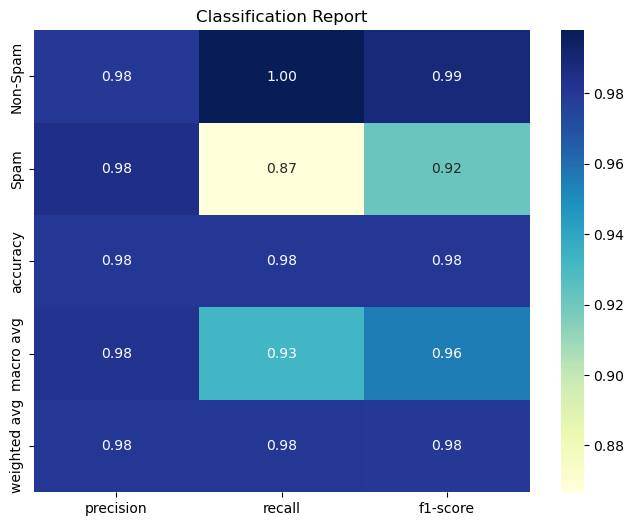

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

# Assuming you have already computed the classification report
classification_rep = classification_report(y_test, y_pred, target_names=['Non-Spam', 'Spam'], output_dict=True)
df = pd.DataFrame(classification_rep).transpose()

# Plot precision, recall, and f1-score
plt.figure(figsize=(8, 6))
sns.heatmap(df[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Classification Report')
plt.show()


In [6]:
def predict_spam_or_not_spam(email_text):
    # Preprocess the email text
    email_text = re.sub(r'\W+', ' ', email_text)
    email_text = email_text.lower()
    email_text = ' '.join([word for word in word_tokenize(email_text) if word not in stop_words])
    
    # Vectorize the email text using the same TF-IDF vectorizer
    email_vector = tfidf_vectorizer.transform([email_text])
    
    # Make the prediction
    prediction = svm_classifier.predict(email_vector)
    
    if prediction[0] == 'spam':
        return "This email is classified as SPAM."
    else:
        return "This email is classified as NOT SPAM."

# Example usage
email_text = "Congratulations, you've won a free iPhone!"
result = predict_spam_or_not_spam(email_text)
print(result)


This email is classified as NOT SPAM.
